In [1]:
import os

print(os.getcwd())

E:\Code\bioML\final


In [3]:
from transformers import AutoImageProcessor

model_name = './image_aug_model_epoch_10_01-07-24-16-05-41'
processor = AutoImageProcessor.from_pretrained(model_name)

In [4]:
from transformers import pipeline

classifier = pipeline("image-classification", model=model_name, tokenizer=processor)

In [5]:
imgs = os.listdir('./sample_images')
print(imgs)

['Atelectasis.jpg', 'Cardiomegaly.jpg', 'Consolidation.jpg', 'Edema.jpg', 'Effusion.jpg', 'Emphysema.jpg', 'Fibrosis.jpg', 'Healthy.jpg', 'Hernia.jpg', 'Infiltration.jpg', 'Mass.jpg', 'Nodule.jpg', 'Pleural_Thickening.jpg', 'Pneumonia.jpg', 'Pneumothorax.jpg']


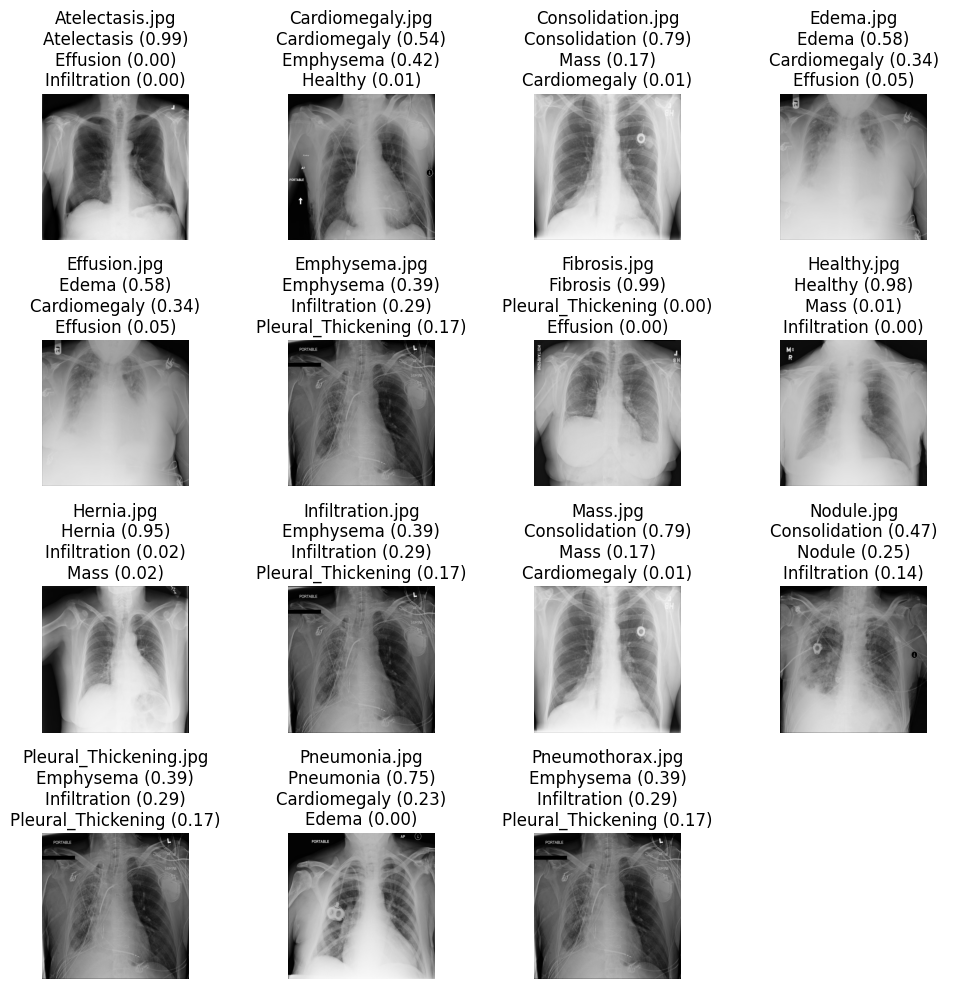

In [6]:
import matplotlib.pyplot as plt
from PIL import Image

fig, ax = plt.subplots(4, 4, figsize=(10, 10))

for i in range(15):
    path = f"./sample_images/{imgs[i]}"
    img = Image.open(path)
    res = classifier(img)
    label = imgs[i]
    for _ in range(3):
        label += f"\n{res[_]['label']} ({res[_]['score']:.2f})"
    ax[i // 4, i % 4].imshow(img)
    ax[i // 4, i % 4].set_title(label)
    ax[i // 4, i % 4].axis("off")

ax[3, 3].axis("off")
plt.tight_layout()
plt.show()

plt.savefig("sample_images.png")